<h2>Student: Vinethaa Krishnaswamy Govindaraj</h2>
<h2>Student # 400250419</h2>
<h2>Assignment 1: Linear Discriminant Analysis</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import sklearn.discriminant_analysis as da
from sklearn.metrics import confusion_matrix

In [103]:
# Function definitions
def compute_confusion_metrics(testDataClass, prediction, method_type):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(testDataClass, prediction).ravel()    
    print('The Confusin Matrix of {}: '.format(method_type))
    print('\tTrue Negative: {}'.format(tn))    
    print('\tTrue Positive: {}'.format(tp))
    print('\tFalse Positive (Type 1 error): {}'.format(fp))
    print('\tFalse Negative (Type 2 error): {}'.format(fn))
    print('\tSo, the error rate is : {}'.format((fp+fn)/(tn+fp+fn+tp)))
    
def train_and_predict_lda_model(trainDataSet, trainDataClass, threshold):    
    # Train the lda model
    lda = da.LinearDiscriminantAnalysis(tol=threshold)
    lda.fit(trainDataSet, trainDataClass)
    prediction = lda.predict(trainDataSet)
    return prediction

<h3>Question 1.</h3>

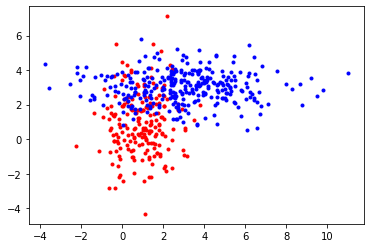

In [20]:
# Read the dataset
fld_dataset = pd.read_csv('fld.csv', header=None, names=['colA', 'colB', 'target'])
fld_dataset_class0 = fld_dataset.loc[fld_dataset['target'] == 0]
fld_dataset_class1 = fld_dataset.loc[fld_dataset['target'] == 1]
# Plot the fld dataset
pt.scatter(fld_dataset_class0.loc[:,'colA'], fld_dataset_class0.loc[:,'colB'], c = 'r', marker = '.')
pt.scatter(fld_dataset_class1.loc[:,'colA'], fld_dataset_class1.loc[:,'colB'], c = 'b', marker = '.')
pt.ion()
pt.show()

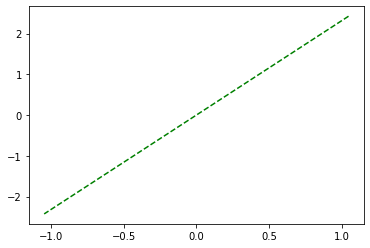

In [42]:
# Implementation of FLD using our class approach: fld w = Sw-1*(u1 - u2)

# Remove the target
fld_dataset_class0 = fld_dataset_class0.loc[:,['colA','colB']]
fld_dataset_class1 = fld_dataset_class1.loc[:,['colA','colB']]

# Compute class means
u0 = fld_dataset_class0.mean(axis = 0)
u1 = fld_dataset_class1.mean(axis = 0)

# Do mean centering. Basically, remove means from classes
fld_dataset_class0_mc = fld_dataset_class0 - u0
fld_dataset_class1_mc = fld_dataset_class1 - u1

# Compute the covariance matrices
S1 = np.dot(fld_dataset_class0_mc.T, fld_dataset_class0)
S2 = np.dot(fld_dataset_class1_mc.T, fld_dataset_class1)
Sw = S1 + S2
w = np.dot(np.linalg.inv(Sw),(u0 - u1))

# Plot the line
pt.plot([-1000*w[0],1000*w[0]], [-1000*w[1],1000*w[1]], 'g--')

<h3>LDA - In Class Approach</h3>

In [69]:
threshold = 0.00

# Prediction for IN-CLASS Approach
predictions_in_class_method = (np.sign(np.dot(w, fld_dataset.loc[:,['colA','colB']].T) + threshold) + 1)/2
# Compute confusion matrix for the prediction
compute_confusion_metrics(fld_dataset.loc[:,['target']].values, predictions_in_class_method, 'IN-CLASS Approach')

The Confusin Matrix of IN-CLASS Approach: 
	True Negative: 155
	True Positive: 0
	False Positive (Type 1 error): 45
	False Negative (Type 2 error): 300


<h3>LDA - Sklearn Approach</h3>

In [70]:
# Prediction for Sklearn Approach
predictions_lda = train_and_predict_lda_model(fld_dataset, fld_dataset.loc[:,'target'], threshold)
# Compute confusion matrix for the prediction
compute_confusion_metrics(fld_dataset.loc[:,['target']].values, predictions_lda, 'Sklearn Approach')

The Confusin Matrix of Sklearn Approach: 
	True Negative: 150
	True Positive: 270
	False Positive (Type 1 error): 50
	False Negative (Type 2 error): 30


C:\Users\e93584\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


<h3>Question 2.</h3>

In [83]:
# Read the dataset
spam_dataset = pd.read_csv('spam.csv')
spam_dataset_class0 = spam_dataset.loc[spam_dataset['Column58'] == 0]
spam_dataset_class1 = spam_dataset.loc[spam_dataset['Column58'] == 1]

In [85]:
# Implementation of FLD using our class approach: fld w = Sw-1*(u1 - u2)

# Remove the target
spam_dataset_class0 = spam_dataset_class0.iloc[:,0:57]
spam_dataset_class1 = spam_dataset_class1.iloc[:,0:57]

# Compute class means
u0 = spam_dataset_class0.mean(axis = 0)
u1 = spam_dataset_class1.mean(axis = 0)

# Do mean centering. Basically, remove means from classes
spam_dataset_class0_mc = spam_dataset_class0 - u0
spam_dataset_class1_mc = spam_dataset_class1 - u1

# Compute the covariance matrices
S1 = np.dot(spam_dataset_class0_mc.T, spam_dataset_class0)
S2 = np.dot(spam_dataset_class1_mc.T, spam_dataset_class1)
Sw = S1 + S2
w = np.dot(np.linalg.inv(Sw),(u0 - u1))

<h3>Trying with different threshold to find the minimum error. <br/>
    The results in terms of confusion matrix and error as follows:</h3>

In [112]:
threshold = [0.000, 0.005, 0.007, 0.008, 0.010, 0.015, 0.020]

for _threshold in threshold :    
    # Prediction for IN-CLASS Approach
    predictions_in_class_method = (np.sign(np.dot(w, spam_dataset.iloc[:, 0:57].T) + _threshold) + 1)/2
    # Compute confusion matrix for the prediction
    compute_confusion_metrics(spam_dataset.loc[:,['Column58']].values, predictions_in_class_method, 'IN-CLASS Approach with threshold {}'.format(_threshold))

The Confusin Matrix of IN-CLASS Approach with threshold 0.0: 
	True Negative: 181
	True Positive: 2
	False Positive (Type 1 error): 319
	False Negative (Type 2 error): 498
	So, the error rate is : 0.817
The Confusin Matrix of IN-CLASS Approach with threshold 0.005: 
	True Negative: 9
	True Positive: 196
	False Positive (Type 1 error): 491
	False Negative (Type 2 error): 304
	So, the error rate is : 0.795
The Confusin Matrix of IN-CLASS Approach with threshold 0.007: 
	True Negative: 3
	True Positive: 330
	False Positive (Type 1 error): 497
	False Negative (Type 2 error): 170
	So, the error rate is : 0.667
The Confusin Matrix of IN-CLASS Approach with threshold 0.008: 
	True Negative: 1
	True Positive: 399
	False Positive (Type 1 error): 499
	False Negative (Type 2 error): 101
	So, the error rate is : 0.6
The Confusin Matrix of IN-CLASS Approach with threshold 0.01: 
	True Negative: 1
	True Positive: 457
	False Positive (Type 1 error): 499
	False Negative (Type 2 error): 43
	So, the err

<h3>Result:<br/></h3>
<h4>Based on the confusion matrix and different thresholds, the minimum error rate is 0.5 with the threshold of 0.02.</h4>

<h3>-- End of Assignment. Thank you! --</h3>